### Locally Weighted and Logistic Regression

I followed [Andrew Ng's CS229 Lecture 3](https://www.youtube.com/watch?v=het9HFqo1TQ) and [NeuralNine's Logistic Regression (Mathematical)](https://www.youtube.com/watch?v=S6iuhdYsGC8) for this section. 

### My Notes

**Locally weighted regression:**

Parametic learning algorithm - fixed set of paraters, like linear regression(LR)

Non-parametric learning algorithm - amount of data/ parameters increases (linearly) with the data set. 

To evaluate H and a certain value of x:

- LR: Fit theta to minimizes cost fuction. 
- Locally weighted regression: Focusing on only the training exmaples which are near the point you want to predict. This is the forumla:

$J(\theta) = \sum_{i=1}^n w^{(i)} (y^{(i)} - \theta^T x^{(i)})^2$

where:
- $\theta$: The parameter vector to be optimized.
- $x^{(i)}$: The $i$-th training input vector.
- $y^{(i)}$: The $i$-th training output value.
- $w^{(i)}$: The weight for the $i$-th training example
  $w^{(i)} = \exp\left(-\frac{\|x^{(i)} - x\|^2}{2\tau^2}\right)$
- $\tau$: The bandwidth parameter controlling the locality of the weighting.
- $n$: The number of training examples.

For the weight formula notice: 

If $|x^{(i)} - x|$ is small then $w^{(i)}$ will be close to 1.

If $|x^{(i)} - x|$ is big then $w^{(i)}$ will be close to 0.

So essentally what the weight is doing is ensuring the examples close to the point you want to predict are being counted by being mulitiped by 1 and those far away and not as important to the calcuation thus being multiplied by close to 0. 


**Logistic Regression**

Returns a binary result.

We want $h_\theta(x) \in [0,1]$ 

In logistic regression, the hypothesis $h_\theta(x)$ represents the predicted probability that the output $y = 1$ given input features $x$. It is defined as:

$$h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$$

where:
- $x$ is the input feature vector (including a bias term $x_0 = 1$).
- $\theta$ is the parameter vector (weights).
- $\theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$ is the linear combination of features.
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function, ensuring $h_\theta(x) \in [0, 1]$.

The sigmond fuction has an asymtote at 0 and at 1, with the graph starting on the left near 0 and increasing to the y-int of 0.1 then approaching 1. 

The data will have this type of distubution:

${P(y = 1 | x; \theta)} = h_\theta(x)$ 
${P(y = 0 | x; \theta)} = 1 - h_\theta(x)$

but remember since this is a a method of binary classification, y can only be $\{0,1\}$. So the two assumtions we made for the type of distubution can be compressed into one:

${P(y | x; \theta)} = h(x)^y(1-h(x))^{1-y}$

So now what we are trying to do is to maximise the log likelihood: 

$$\ell(\theta) = \log L(\theta) = \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]$$


In other words, choose $\theta$ such that $L(\theta)$ is maximised. 

So thinking back to linear regression:
 - LR: Minimizing the cost fuction
 - Logistic Regression: Maximizing the log likeliy hood. 

The algo we will use to find the maximum is batch gradient ascent. Its similar to linear regression: 

$\theta_j := \theta_j + \alpha \frac{\partial}{\partial \theta_j} L(\theta)$


**Newton’s Method for Logistic Regression:** 
An alternative to gradient ascent is Newton’s method (also called Newton-Raphson), which often converges faster for logistic regression. It iteratively updates $(\theta)$ to maximize $(\ell(\theta))$ using the first and second derivatives (gradient and Hessian).

Lets say you want to maximize $\ell(\theta)$, you have to find $\ell'(\theta) = 0$

The update rule for Newton's method is (only real numbers):
$$\theta^{(k+1)} := \theta^{(k)} - \frac{f(\theta^{(k)})}{f'(\theta^{(k)})}$$
Where:
$\theta^{(k)}$: Parameter value at iteration $k$.
$\theta^{(k+1)}$: Updated parameter value at iteration $k+1$.
$f(\theta^{(k)})$: Function value at $\theta^{(k)}$.
$f'(\theta^{(k)})$: First derivative of the function at $\theta^{(k)}$.

If $\theta$ is a vector the update rule is:
$$\theta := \theta - H^{-1} \nabla_{\theta} \ell(\theta)$$
Where:
$\theta$: Parameter vector to be optimized.
$\ell(\theta)$: Log-likelihood function (or negative log-likelihood for minimization).
$\nabla_{\theta} \ell(\theta)$: Gradient of the log-likelihood with respect to $\theta$.
$H$: Hessian matrix, which is the second derivative (matrix of partial derivatives) of the log-likelihood with respect to $\theta$.



**Advantages:**

Faster convergence than gradient ascent for logistic regression, especially for smaller datasets.

No need to tune a learning rate $\alpha$.



**Challenges with Newtons method:**
Computing the Hessian and its inverse is costly for high-dimensional data. For large datasets, alternatives like stochastic gradient ascent or quasi-Newton methods (e.g., L-BFGS may be preferred.



### Implemtation: 

I followed [NeuralNine's Logistic Regression](https://www.youtube.com/watch?v=S6iuhdYsGC8) for this section. 

Developed the model from scratch mathematically.

Training Accuracy: 0.9824175824175824
Test Accuracy: 0.9824561403508771


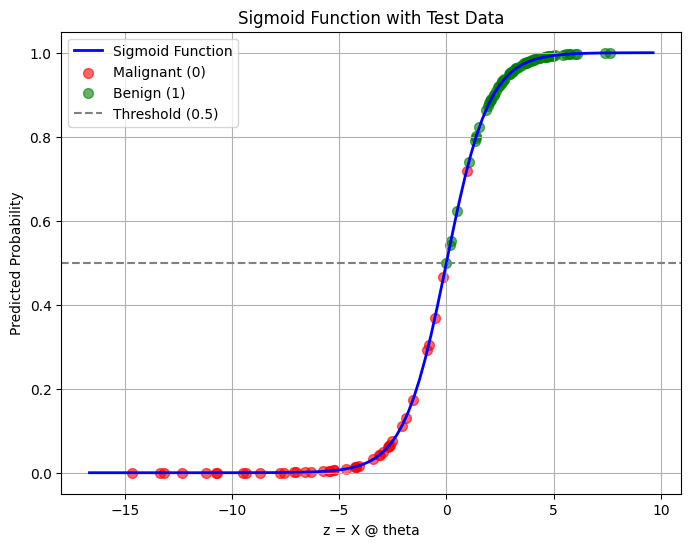

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer #importing dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) # sigmoid formula

def calcuate_gradient(theta, X, y):
    m = y.size # num of instances
    return (X.T @ (sigmoid(X @ theta) - y)) / m # gradient formula

def gradient_descent(X, y, alpha=0.1, iter=100, tol=1e-7): # optimizing for theta 

    #bias
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(X_b.shape[1])
    
    for i in range(iter):
        gradient = calcuate_gradient(theta, X_b, y)
        theta -= alpha * gradient  # update theta: subtract learning rate * gradient
        if np.linalg.norm(gradient) < tol:
            break
    
    return theta

#predict probabilities for input data
def predict_proba(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return sigmoid(X_b @ theta)

#binary predictions based on a threshold
def predict(X, theta, threshold=0.5):
    return (predict_proba(X, theta) >= threshold).astype(int)

# Load and preprocess data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training model
theta_hat = gradient_descent(X_train_scaled, y_train, alpha=0.1)

# Make predictions
Y_pred_train = predict(X_train_scaled, theta_hat)
Y_pred_test = predict(X_test_scaled, theta_hat)

# Calculate accuracy
train_acc = accuracy_score(y_train, Y_pred_train)
test_acc = accuracy_score(y_test, Y_pred_test)

print(f"Training Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

# Prepare data for plotting
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
z_test = X_test_b @ theta_hat  # Linear combination for test data
proba_test = sigmoid(z_test)   # Predicted probabilities

# Plot sigmoid function and data
z = np.linspace(min(z_test) - 2, max(z_test) + 2, 100)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, label='Sigmoid Function', color='blue', linewidth=2)
plt.scatter(z_test[y_test == 0], proba_test[y_test == 0], c='red', label='Malignant (0)', alpha=0.6, s=50)
plt.scatter(z_test[y_test == 1], proba_test[y_test == 1], c='green', label='Benign (1)', alpha=0.6, s=50)
plt.axhline(y=0.5, color='gray', linestyle='--', label='Threshold (0.5)')
plt.title('Sigmoid Function with Test Data')
plt.xlabel('z = X @ theta')
plt.ylabel('Predicted Probability')
plt.grid(True)
plt.legend()
plt.show()